In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame()
df = pd.read_csv("train_proper_csv_attack_types.csv",header = None)
df = df.rename(columns=df.iloc[0])
df = df.drop(df.index[0])
df = df.drop('unknown2',axis=1)

C:\Users\Rupesh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df1 = pd.DataFrame()
df1 = pd.read_csv("test_proper_csv_attack_types.csv",header = None)
df1 = df1.rename(columns=df1.iloc[0])
df1 = df1.drop(df1.index[0])
df1 = df1.drop('unknown2',axis=1)

C:\Users\Rupesh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_tot = pd.concat([df,df1])

In [5]:
def bool_attack(x):
    if(x != "normal"):
        return "attack"
    else:
        return "normal"

In [6]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import Normalizer

df_tot_1 = df_tot.drop('unknown1',axis=1)
df_output = df_tot['unknown1'].apply(bool_attack)
df_tot_dummies = pd.get_dummies(df_tot_1,columns = ["protocol_type","service","flag"])
x_normalise = Normalizer().fit(df_tot_dummies)
df_tot_dummies = x_normalise.transform(df_tot_dummies)

clf = ExtraTreesClassifier()
clf = clf.fit(df_tot_dummies, df_output)
model = SelectFromModel(clf, prefit=True)
x_new = model.transform(df_tot_dummies)

In [13]:
x_new.shape

(148516, 17)

In [8]:
import pickle

random_forest_clf = pickle.load(open('knn_10_test_tree_sel.sav', 'rb'))
AdaBoost_clf = pickle.load(open('random_forest_test_tree_sel.sav', 'rb'))
gnb_clf = pickle.load(open('qda_test_tree_sel.sav', 'rb'))

In [9]:
X_train = x_new[:125000]
y_train = df_output.iloc[:125000]
X_test = x_new[125000:]
y_test = df_output.iloc[125000:]

In [10]:
from sklearn.metrics import classification_report

In [11]:
def convert_bool(x):
    if(x == "attack"):
        return 1
    else:
        return 0
    
y_train = y_train.apply(convert_bool)

In [29]:
type(y_train)

pandas.core.series.Series

In [12]:
rf_pred = random_forest_clf.predict(X_train)
rf_conf = random_forest_clf.predict_proba(X_train)
ada_pred = AdaBoost_clf.predict(X_train)
ada_conf = AdaBoost_clf.predict_proba(X_train)
gnb_pred = gnb_clf.predict(X_train)
gnb_conf = gnb_clf.predict_proba(X_train)

ValueError: query data dimension must match training data dimension

In [12]:
conf_vec_list=[]
clf_vec_list=[]
state_vec_list=[]

In [13]:
for i in range(len(rf_pred)):
    tmp1=[]
    tmp1.append(convert_bool(rf_pred[i]))
    tmp1.append(convert_bool(ada_pred[i]))
    tmp1.append(convert_bool(gnb_pred[i]))
    clf_vec_list.append(tmp1)
    state_vec_list.append(tmp1+list(x_new[i]))
    
    tmp1=[]
    tmp1.append(rf_conf[i])
    tmp1.append(ada_conf[i])
    tmp1.append(gnb_conf[i])
    conf_vec_list.append(tmp1)

In [14]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
# fix random seed for reproducibility
np.random.seed(7)

Using TensorFlow backend.


In [15]:
conf_vec_list[:10]

[[array([ 0.,  1.]),
  array([ 0.,  1.]),
  array([  5.05001561e-19,   1.00000000e+00])],
 [array([ 0.,  1.]),
  array([ 0.,  1.]),
  array([  2.51031979e-12,   1.00000000e+00])],
 [array([ 1.,  0.]),
  array([ 1.,  0.]),
  array([  1.00000000e+00,   1.61575538e-16])],
 [array([ 0.,  1.]),
  array([ 0.,  1.]),
  array([  8.77670023e-50,   1.00000000e+00])],
 [array([ 0.,  1.]),
  array([ 0.,  1.]),
  array([  9.72164450e-36,   1.00000000e+00])],
 [array([ 1.,  0.]),
  array([ 1.,  0.]),
  array([  9.99999999e-01,   1.41560016e-09])],
 [array([ 1.,  0.]),
  array([ 1.,  0.]),
  array([  1.00000000e+00,   6.02462886e-31])],
 [array([ 1.,  0.]),
  array([ 1.,  0.]),
  array([  1.00000000e+00,   2.82395051e-11])],
 [array([ 1.,  0.]),
  array([ 1.,  0.]),
  array([  1.00000000e+00,   2.87394252e-57])],
 [array([ 1.,  0.]),
  array([ 1.,  0.]),
  array([  1.00000000e+00,   1.42291965e-19])]]

In [48]:
len(x_new[0])

36

In [16]:
# create model
model = Sequential()
model.add(Dense(100, input_dim=39, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

In [17]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [18]:
model.predict(np.array(state_vec_list[0:20]))

array([[ 0.52223468,  0.50197023,  0.52058482],
       [ 0.51634407,  0.4753333 ,  0.51719451],
       [ 0.56946278,  0.51359379,  0.51302016],
       [ 0.51796424,  0.49996078,  0.50077766],
       [ 0.52991748,  0.51153398,  0.49795502],
       [ 0.56787443,  0.51252425,  0.51439708],
       [ 0.56754595,  0.51141453,  0.51095921],
       [ 0.56753427,  0.51129276,  0.51428437],
       [ 0.57210755,  0.51349461,  0.511913  ],
       [ 0.5675782 ,  0.5114218 ,  0.51286632],
       [ 0.5690912 ,  0.51154763,  0.51135319],
       [ 0.56946015,  0.51145571,  0.51044172],
       [ 0.52022952,  0.50365883,  0.49979749],
       [ 0.54426497,  0.50578737,  0.53136343],
       [ 0.5678013 ,  0.50880486,  0.51125932],
       [ 0.56491464,  0.50724429,  0.51649427],
       [ 0.51742667,  0.49926502,  0.50111121],
       [ 0.58371007,  0.56830525,  0.5494417 ],
       [ 0.52471089,  0.51340091,  0.49741268],
       [ 0.52262503,  0.50674933,  0.49797383]], dtype=float32)

In [19]:
input_list = []
output_list = []

In [20]:
def get_rew(qval_v,y,conf_v,clf_v):
    
    act_qval=[]
    
    for j in range(3):
        
        if(y == clf_v[j]):
            #print(qval_v[j])
            #print(conf_v[j]/5)
            tmp = qval_v[j] + conf_v[j][y]/2
            
            if(tmp>1):
                tmp = 0.95

            act_qval.append(tmp)
        else:
            tmp = qval_v[j] - (conf_v[j][abs(1-y)])/2
            if(tmp<0):
                tmp = 0.05

            act_qval.append(tmp)
    
    return act_qval

In [21]:
def get_batch(ind_list, input_list, output_list):
    x=[]
    y=[]
    for item in ind_list:
        x.append(input_list[item])
        y.append(output_list[item])
    
    return x,y

In [22]:
import random

for i in range((int)(len(state_vec_list)/10)):
    
    #print("itteration: " + str(i))
    input_list = input_list + state_vec_list[i*10:(i+1)*10]
    Q_val_list = model.predict(np.array(state_vec_list[i*10:(i+1)*10]))
    act_out_list = []
    
    if(i<5):
        print(Q_val_list)
    
    for j in range(len(Q_val_list)):
        #print(conf_vec_list[i*10+j])
        act_out_list.append(get_rew(Q_val_list[j],y_train[i*10+j+1],conf_vec_list[i*10+j],clf_vec_list[i*10+j]))
        
    model.train_on_batch(np.array(state_vec_list[i*10:(i+1)*10]), np.array(act_out_list))
    
    output_list = output_list + act_out_list
    #print(len(input_list))
    #print(len(output_list))
    for j in range(10):
        ind_list = random.sample(range(0, len(input_list)), 10)
        x, y = get_batch(ind_list, input_list, output_list)
        
        model.train_on_batch(np.array(x), np.array(y))

[[ 0.52223468  0.50197023  0.52058482]
 [ 0.51634407  0.4753333   0.51719451]
 [ 0.56946278  0.51359379  0.51302016]
 [ 0.51796424  0.49996078  0.50077766]
 [ 0.52991748  0.51153398  0.49795502]
 [ 0.56787443  0.51252425  0.51439708]
 [ 0.56754595  0.51141453  0.51095921]
 [ 0.56753427  0.51129276  0.51428437]
 [ 0.57210755  0.51349461  0.511913  ]
 [ 0.5675782   0.5114218   0.51286626]]
[[ 0.5687241   0.5100131   0.50570196]
 [ 0.56902254  0.50985843  0.50496501]
 [ 0.5198558   0.50334305  0.4958989 ]
 [ 0.54427463  0.5038299   0.52769244]
 [ 0.5674246   0.50743538  0.50582439]
 [ 0.56490988  0.50567961  0.5088551 ]
 [ 0.51711988  0.49900386  0.49697071]
 [ 0.58314735  0.5649153   0.54432493]
 [ 0.52431279  0.51253021  0.49333784]
 [ 0.52233469  0.5060845   0.49401397]]
[[ 0.57129943  0.51017749  0.50894052]
 [ 0.57090175  0.50982773  0.5091368 ]
 [ 0.51767731  0.49676758  0.49793467]
 [ 0.5020169   0.50248528  0.50223714]
 [ 0.56779504  0.50622308  0.50810105]
 [ 0.51713979  0.496005

In [23]:
from keras.models import model_from_json
model_json = model.to_json()
with open("model_rf_knn_qda.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_rf_knn_qda.h5")
print("Saved model to disk")



Saved model to disk


In [ ]:
# Fit the model
model.fit(np.array(state_vec_list), np.array(y_train), epochs=30, batch_size=10)

In [30]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model.h5")

In [31]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [43]:
rf_pred_ts = random_forest_clf.predict(X_test)
rf_conf_ts = random_forest_clf.predict_proba(X_test)
ada_pred_ts = AdaBoost_clf.predict(X_test)
ada_conf_ts = AdaBoost_clf.predict_proba(X_test)
gnb_pred_ts = gnb_clf.predict(X_test)
gnb_conf_ts = gnb_clf.predict_proba(X_test)

In [44]:
conf_vec_list_ts=[]
clf_vec_list_ts=[]
state_vec_list_ts=[]

In [45]:
for i in range(len(rf_pred_ts)):
    tmp1=[]
    tmp1.append(convert_bool(rf_pred_ts[i]))
    tmp1.append(convert_bool(ada_pred_ts[i]))
    tmp1.append(convert_bool(gnb_pred_ts[i]))
    clf_vec_list_ts.append(tmp1)
    state_vec_list_ts.append(tmp1+list(X_test[i]))
    
    tmp1=[]
    tmp1.append(rf_conf_ts[i])
    tmp1.append(ada_conf_ts[i])
    tmp1.append(gnb_conf_ts[i])
    conf_vec_list_ts.append(tmp1)

In [46]:
input_list_ts = []
output_list_ts = []
pred_list = []

In [47]:
input_vec = []


In [48]:
for i in range(len(rf_pred_ts)):
    tmp1=[]
    tmp1.append(convert_bool(rf_pred_ts[i]))
    tmp1.append(convert_bool(ada_pred_ts[i]))
    tmp1.append(convert_bool(gnb_pred_ts[i]))
    input_vec.append(tmp1+list(X_test[i]))
    
y_test = np.array(y_test.apply(convert_bool))

In [38]:
(int)(len(state_vec_list_ts)/10)

2351

In [32]:
import copy

In [49]:
import random

for i in range((int)(len(state_vec_list_ts)/10)):
    
    print("itteration: " + str(i))
    input_list_ts = input_list_ts + state_vec_list_ts[i*10:(i+1)*10]
    Q_val_list = model.predict(np.array(state_vec_list_ts[i*10:(i+1)*10]))
    
    if(i%50 == 0):
        print(Q_val_list)
    
    for i in range(len(Q_val_list)):
        pred_list.append(Q_val_list[i])
        
    #scores = model.test_on_batch(np.array(state_vec_list_ts[i*10:(i+1)*10]), np.array(act_out_list))
    #print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    
    act_out_list = []
    
    for j in range(len(Q_val_list)):
        #print(conf_vec_list[i*10+j])
        act_out_list.append(get_rew(Q_val_list[j],y_test[i*10+j+1],conf_vec_list_ts[i*10+j],clf_vec_list_ts[i*10+j]))
        
    model.train_on_batch(np.array(state_vec_list_ts[i*10:(i+1)*10]), np.array(act_out_list))
    
    output_list_ts = output_list_ts + act_out_list
    #print(len(input_list))
    #print(len(output_list))
    for j in range(10):
        ind_list = random.sample(range(0, len(input_list_ts)), 10)
        x, y = get_batch(ind_list, input_list_ts, output_list_ts)
        
        model.train_on_batch(np.array(x), np.array(y))

itteration: 0
[[ 0.5752461   0.9496581   0.52634168]
 [ 0.56487674  0.95110887  0.52962822]
 [ 0.58082509  0.94894582  0.52103454]
 [ 0.5705713   0.95107847  0.52281874]
 [ 0.54527217  0.94910109  0.51129496]
 [ 0.54171479  0.94922262  0.5129711 ]
 [ 0.55112618  0.94962281  0.54603112]
 [ 0.58743834  0.95000696  0.52088624]
 [ 0.54514587  0.94757462  0.50432354]
 [ 0.57047266  0.95099252  0.52260959]]
itteration: 1
itteration: 2
itteration: 3
itteration: 4
itteration: 5
itteration: 6
itteration: 7
itteration: 8
itteration: 9
itteration: 10
itteration: 11
itteration: 12
itteration: 13
itteration: 14
itteration: 15
itteration: 16
itteration: 17
itteration: 18
itteration: 19
itteration: 20
itteration: 21
itteration: 22
itteration: 23
itteration: 24
itteration: 25
itteration: 26
itteration: 27
itteration: 28
itteration: 29
itteration: 30
itteration: 31
itteration: 32
itteration: 33
itteration: 34
itteration: 35
itteration: 36
itteration: 37
itteration: 38
itteration: 39
itteration: 40
itte

In [66]:
len(pred_list)

23510

In [64]:
def pred(y_pred):
    
    y_pred_1=[]
    for k in range(len(y_pred)):
        ac=0
        nc=0
        if(y_pred[k][0] > float(0.5)):
            if(convert_bool(rf_pred_ts[k]) == 1):
                ac = ac+1
            else:
                nc = nc+1

        if(y_pred[k][1] > float(0.6)):
            if(convert_bool(ada_pred_ts[k]) == 1):
                ac = ac+1
            else:
                nc = nc+1

        if(y_pred[k][2] > float(0.9)):
            if(convert_bool(gnb_pred_ts[k]) == 1):
                ac = ac+1
            else:
                nc = nc+1

        print(ac-nc)
        if(ac > nc):
            y_pred_1.append(1)
        else:
            y_pred_1.append(0)
            
    return y_pred_1

In [65]:
pred_out = pred(pred_list)

2
-2
2
-2
-2
-2
-2
2
-2
-2
-2
2
-2
2
2
-2
-2
2
2
-2
-2
2
-2
2
-2
-2
-2
-2
-2
-2
2
-2
-2
-2
-2
-2
-2
2
2
2
2
-2
2
-2
-2
2
-2
-2
2
2
2
-2
2
2
-2
2
-2
-2
2
-2
-2
-2
2
-2
-2
1
2
2
2
2
-2
2
-2
2
-2
-2
2
-2
2
-2
-2
-2
2
2
2
2
2
-2
-2
2
2
-2
-2
2
2
-2
-2
2
2
2
-2
2
-2
2
2
2
-2
-2
2
1
-2
-2
-2
2
2
2
2
2
1
-2
-2
-2
-2
2
2
2
2
2
-2
2
2
-2
-2
-2
2
-2
1
-2
-2
-2
-2
2
2
-2
2
-2
-2
-2
2
-2
2
2
2
-2
-2
-2
-2
-2
2
-2
-2
1
-2
2
2
-2
-2
-2
2
2
2
-2
2
-2
-2
2
-2
-2
1
2
-2
1
-2
2
2
2
-2
2
2
2
-2
-2
-2
-2
2
2
-2
2
-2
-2
2
2
-2
-2
-2
-2
-1
2
2
-2
-2
-2
2
2
2
-2
2
-2
-2
-2
-2
-2
2
2
-2
2
-1
-2
2
-2
2
-1
-2
2
-2
-2
-1
-1
2
2
-2
-2
-2
2
-2
2
-2
-1
-1
-2
2
-2
-2
-2
2
2
-2
-2
-2
-2
-2
-2
2
-2
2
2
-2
-2
2
2
-2
-1
2
-2
2
-1
-2
-2
-2
-2
-1
-2
-2
2
2
2
2
-2
2
-1
-2
-2
-2
2
2
-2
-2
-2
-2
-2
2
2
-2
-2
-2
2
-2
-2
-2
2
-2
2
-2
-2
-2
-1
-2
1
-2
-1
1
2
2
2
-2
-2
-2
2
2
-2
2
-2
1
2
-2
2
-2
2
2
2
2
2
2
-1
2
-2
2
-2
-2
-2
-2
-2
-1
2
2
2
2
-2
2
-2
1
-2
2
-2
1
-2
2
2
2
-1
2
2
-2
-1
2
-2
2
2
2
-2
2
2
2
-2
-2
-2
-2
-2
2
-2
2
2
-

In [52]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [53]:
def cal_fpr_acc(TP,FP,TN,FN):
    acc = (TP+TN)/(TP+TN+FP+FN)
    fpr = (FP)/(FP+TN)
    
    return fpr, acc

In [66]:
params = list(perf_measure(np.array(y_test),np.array(pred_out)))
cal_fpr_acc(params[0],params[1],params[2],params[3])

(0.026171875, 0.8107188430455126)

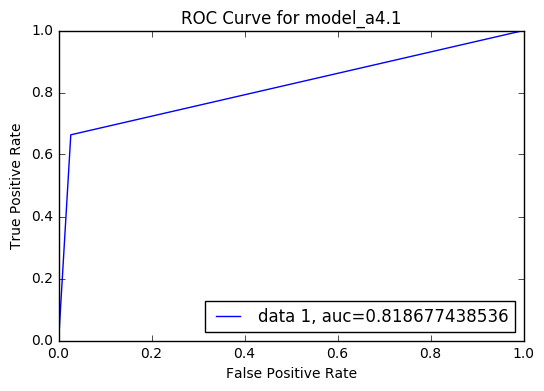

In [62]:
from sklearn import metrics as mt
import matplotlib.pyplot as plt

fpr, tpr, _ = mt.roc_curve(np.array(y_test[:23510]),np.array(pred_out))
auc = mt.roc_auc_score(np.array(y_test[:23510]),np.array(pred_out))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for model_a4.1')
plt.legend(loc=4)
plt.show()

In [38]:
ada_pred_ts

array(['attack', 'normal', 'attack', ..., 'attack', 'normal', 'attack'], dtype=object)

In [26]:
y_pred = model.predict(np.array(input_vec))

In [39]:
print(rf_pred_ts[0])
print(ada_pred_ts[0])
print(svc_pred_ts[0])
print(y_pred[0])

attack
attack
attack
[ 0.56398749  0.95026147  0.95035213]


In [71]:
params = list(perf_measure(np.array(y_test),y_pred_1))
cal_fpr_acc(params[0],params[1],params[2],params[3])

(0.026164209704188226, 0.8107671372682429)

In [40]:
# evaluate the model
scores = model.evaluate(np.array(input_vec), y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

23264/23516 [============================>.] - ETA: 0s
acc: 81.07%


In [41]:
from sklearn.metrics import confusion_matrix

In [47]:
y_pred = model.predict(np.array(input_vec))



In [49]:
perf_measure(np.array(y_test),y_pred)

(7151, 232, 9348, 3642)

In [22]:
model.predict(np.array(state_vec_list[30:50]))

array([[ 0.58925104,  0.94940388,  0.94942933],
       [ 0.56969208,  0.94931269,  0.94956756],
       [ 0.52008027,  0.94968128,  0.94975591],
       [ 0.56361681,  0.95003319,  0.95029205],
       [ 0.54490072,  0.94995046,  0.94972837],
       [ 0.51979095,  0.94827014,  0.94873452],
       [ 0.54613537,  0.95046735,  0.95027506],
       [ 0.56381893,  0.95011669,  0.95015258],
       [ 0.5239948 ,  0.94944054,  0.94952422],
       [ 0.56291771,  0.95010185,  0.95014113],
       [ 0.56979054,  0.94930077,  0.94955927],
       [ 0.56214434,  0.9501701 ,  0.95020354],
       [ 0.52084476,  0.94964552,  0.94996887],
       [ 0.50787294,  0.94820678,  0.94853979],
       [ 0.52398324,  0.94946116,  0.94959015],
       [ 0.56421059,  0.95007795,  0.95017695],
       [ 0.5739041 ,  0.95045245,  0.95057786],
       [ 0.52979797,  0.94924563,  0.9493807 ],
       [ 0.57302642,  0.11274257,  0.12911497],
       [ 0.56214583,  0.95018411,  0.95022792]], dtype=float32)